In [1]:
import numpy as np
import importlib
import util as uti
import matplotlib.pyplot as plt
importlib.reload(uti)

# import math lib
from math import pi

# import Qiskit
from qiskit import Aer, IBMQ, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# import basic plot tools
#import qiskit.visualization as vis
from qiskit.visualization import plot_histogram
%matplotlib inline

/home/kinga/.local/lib/python3.6/site-packages/qiskit/__init__.py:67: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of the 0.17.0 release. Support for running Qiskit with Python 3.6 will be removed in a future release.
  "future release.", DeprecationWarning)


# 2D input class 0, class 1

In [2]:
samples_n = int(4)
data_bg = np.random.multivariate_normal(mean=(1,1), cov=np.eye(2)*0.2, size=samples_n)
data_sig = np.random.multivariate_normal(mean=(2,2), cov=np.eye(2)*0.5, size=samples_n)

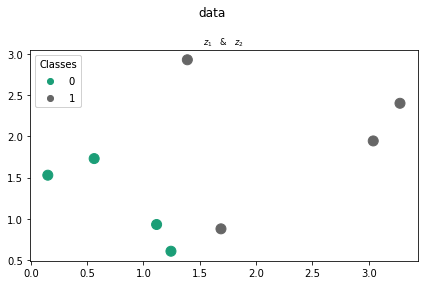

In [3]:
uti.plot_clusters(np.vstack([data_bg, data_sig]), np.vstack([np.zeros((samples_n,1)), np.ones((samples_n,1))]))

In [4]:
data_bg

array([[1.24456529, 0.60738075],
       [1.11714509, 0.93161871],
       [0.15134687, 1.52983171],
       [0.56286986, 1.73146069]])

In [5]:
data_sig

array([[1.68857182, 0.87904942],
       [1.39012775, 2.93014734],
       [3.27784441, 2.40225798],
       [3.04038165, 1.94544421]])

# Quantum Circuit

In [15]:
# reference: https://github.com/CQCL/qiskit-tutorial/blob/master/community/awards/teach_me_qiskit_2018/quantum_machine_learning/1_K_Means/Quantum%20K-Means%20Algorithm.ipynb

In [6]:
# To use local qasm simulator
backend = Aer.get_backend('qasm_simulator')

In [7]:
# create Quantum Register called "qr" with 5 qubits
qr = QuantumRegister(5, name="qr")
# create Classical Register called "cr" with 5 bits
cr = ClassicalRegister(5, name="cr")
    
# Creating Quantum Circuit called "qc" involving your Quantum Register "qr"
# and your Classical Register "cr"
qc = QuantumCircuit(qr, cr, name="k_means")

### plot circuit

/home/kinga/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  after removing the cwd from sys.path.


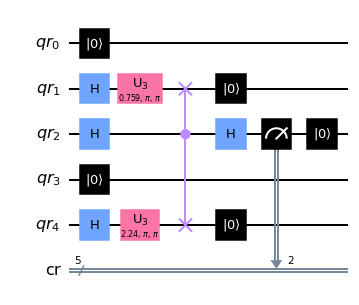

In [13]:
qc.h(qr[2])
qc.h(qr[1])
qc.h(qr[4])
qc.u3(data_bg[0,0], pi, pi, qr[1])
qc.u3(data_sig[0,0], pi, pi, qr[4])
qc.cswap(qr[2], qr[1], qr[4])
qc.h(qr[2])

qc.measure(qr[2], cr[2])
qc.reset(qr)
    
qc.draw(output='mpl') #We draw the circuit

## cluster data

In [8]:
%matplotlib notebook
counts_list = []
for x_bg, x_sig in zip(data_bg[:,0], data_sig[:,0]):
    #Run clustering with quantum circuit via qiskit
    qc.h(qr[2])
    qc.h(qr[1])
    qc.h(qr[4])
    qc.u3(x_bg, pi, pi, qr[1])
    qc.u3(x_sig, pi, pi, qr[4])
    qc.cswap(qr[2], qr[1], qr[4])
    qc.h(qr[2])

    qc.measure(qr[2], cr[2])
    qc.reset(qr)

    job = execute(qc, backend=backend, shots=1024)
    counts_list.append(job.result().get_counts())
    #print(result)
    print('x_bg:' + str(x_bg))
    print('x_sig:' + str(x_sig))
#   print( result.get_data(qc))
    print(job.result().get_counts())

/home/kinga/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  


x_bg:1.2445652864894976
x_sig:1.6885718190015915
{'00100': 27, '00000': 997}
x_bg:1.1171450881820535
x_sig:1.3901277450478173
{'00100': 2, '00000': 1022}
x_bg:0.15134687136958613
x_sig:3.2778444110607676
{'00000': 501, '00100': 523}
x_bg:0.5628698552628584
x_sig:3.0403816470869147
{'00100': 485, '00000': 539}


In [9]:
counts_list

[{'00100': 27, '00000': 997},
 {'00100': 2, '00000': 1022},
 {'00000': 501, '00100': 523},
 {'00100': 485, '00000': 539}]

<IPython.core.display.Javascript object>


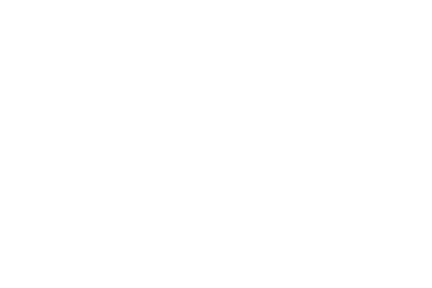

In [10]:
uti.plot_clusters(np.vstack([data_bg, data_sig]), np.vstack([np.zeros((samples_n,1)), np.ones((samples_n,1))]))

<IPython.core.display.Javascript object>


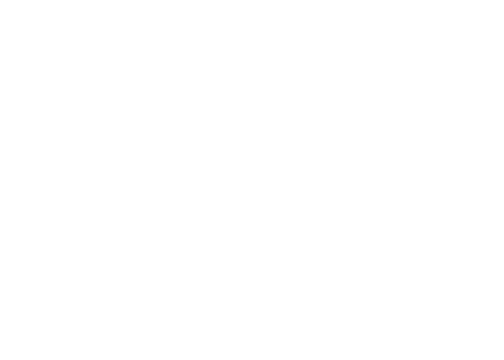

<IPython.core.display.Javascript object>


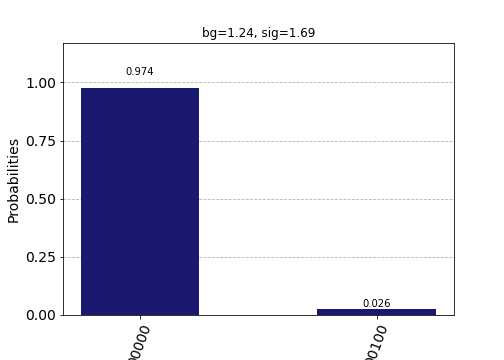

In [11]:
idx = 0
plot_histogram(counts_list[idx], color='midnightblue', title="bg={:.2f}, sig={:.2f}".format(data_bg[idx,0],data_sig[idx,0]))

<IPython.core.display.Javascript object>


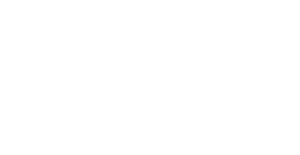

<IPython.core.display.Javascript object>


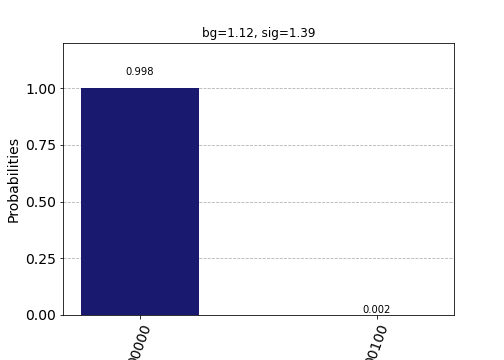

In [12]:
idx = 1
plot_histogram(counts_list[idx], color='midnightblue', title="bg={:.2f}, sig={:.2f}".format(data_bg[idx,0],data_sig[idx,0]))

<IPython.core.display.Javascript object>


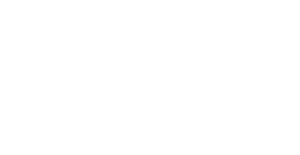

<IPython.core.display.Javascript object>


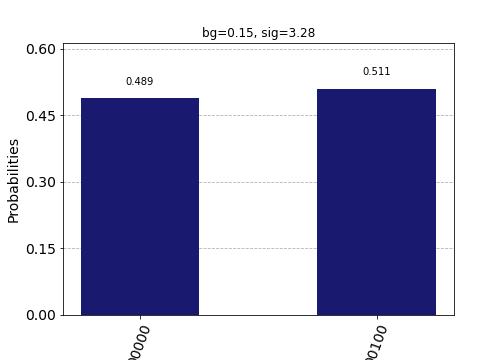

In [13]:
idx = 2
plot_histogram(counts_list[idx], color='midnightblue', title="bg={:.2f}, sig={:.2f}".format(data_bg[idx,0],data_sig[idx,0]))

<IPython.core.display.Javascript object>


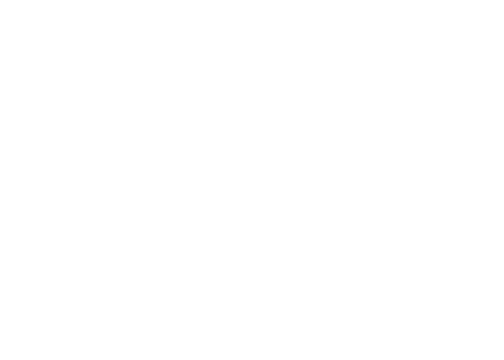

<IPython.core.display.Javascript object>


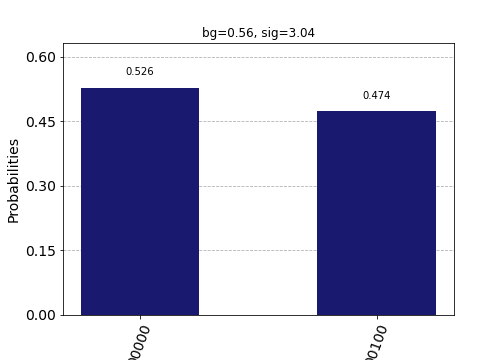

In [14]:
idx = 3
plot_histogram(counts_list[idx], color='midnightblue', title="bg={:.2f}, sig={:.2f}".format(data_bg[idx,0],data_sig[idx,0]))